In [1]:
from mclp import *
import pandas as pd

In [2]:
%matplotlib inline

### Generate input data

In [3]:
cctv = pd.read_csv('./data/CCTV.csv',encoding='cp949')
cctv.head()

,NAME,경도,위도
0,월평교차로,129.140873,35.357617
1,좌천사거리,129.239996,35.318388
2,노포차량기지앞,129.096650,35.288899
3,범어사입구,129.092502,35.275736
4,경부TG,129.108796,35.274671


In [121]:
school = pd.read_csv('./data/초등학교,유치원.csv',encoding='cp949')
school.head()

,NAME,위도,경도
0,감천초등학교,35.083096,129.007605
1,광일초등학교,35.103725,129.029861
2,괴정초등학교,35.103763,128.999875
3,구덕초등학교,35.120262,129.012359
4,구평초등학교,35.087007,128.989239


In [4]:
arr = np.empty((0,2), int)

In [123]:
# 2차원 배열 만들기
for i in range(0,len(school)):
    # arr = np.array([[cctv['경도'][i],cctv['위도'][i]]])
    arr = np.append(arr, np.array([[school['경도'][i],school['위도'][i]]]),axis=0)

In [5]:
# 2차원 배열 만들기
for i in range(0,len(cctv)):
    # arr = np.array([[cctv['경도'][i],cctv['위도'][i]]])
    arr = np.append(arr, np.array([[cctv['경도'][i],cctv['위도'][i]]]),axis=0)

In [6]:
arr

array([[129.140873  ,  35.357617  ],
       [129.239996  ,  35.318388  ],
       [129.09665   ,  35.2888986 ],
       [129.092502  ,  35.275736  ],
       [129.108796  ,  35.27467056],
       [129.092939  ,  35.266667  ],
       [129.0998452 ,  35.25309999],
       [129.220935  ,  35.251513  ],
       [129.1035472 ,  35.24840765],
       [129.093001  ,  35.246593  ],
       [129.2180415 ,  35.23573703],
       [129.005982  ,  35.235577  ],
       [128.995092  ,  35.235095  ],
       [129.013626  ,  35.23481   ],
       [129.086384  ,  35.231319  ],
       [129.091587  ,  35.230741  ],
       [129.0126358 ,  35.22861249],
       [129.0082763 ,  35.22040701],
       [129.129774  ,  35.22002   ],
       [129.084225  ,  35.218093  ],
       [128.9900458 ,  35.21728531],
       [129.1178377 ,  35.2167619 ],
       [129.043852  ,  35.215264  ],
       [129.0044773 ,  35.21488583],
       [129.1087064 ,  35.21422275],
       [129.036648  ,  35.213635  ],
       [129.026555  ,  35.2135809 ],
 

In [143]:
import numpy as np
Npoints = 300
# Generate points in uniform distribution 
# points = np.random.rand(Npoints,2)

# Generate points in moon distribution
from sklearn.datasets import make_moons
points,_ = make_moons(Npoints,noise=0.15)

In [144]:
type(points)

numpy.ndarray

NameError: name 'ax' is not defined

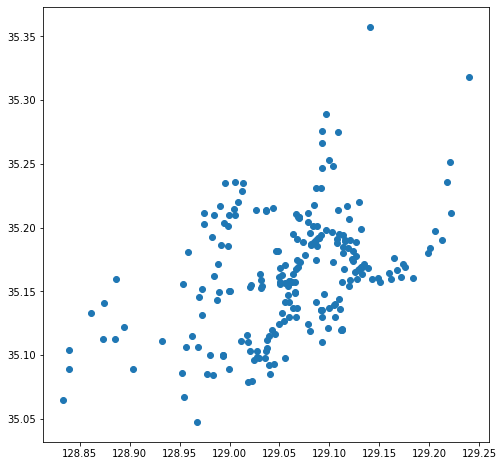

In [7]:
# Plot input data
plot_input(arr)

### Run the optimization

----- Configurations -----
  Number of points 226
  K 20
  Radius 0.01
  M 100
Restricted license - for non-production use only - expires 2022-01-13
----- Output -----
  Running time : 0.049790143966674805 seconds
  Optimal coverage points: 71


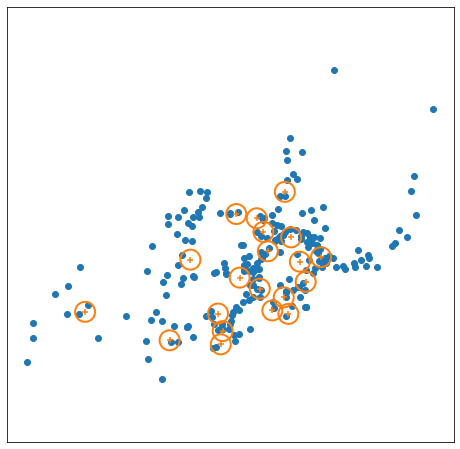

In [8]:
# Number of sites to select
K = 20

# Service radius of each site
radius = 0.01

# Candidate site size (random sites generated)
# 한 동그라미에 많이 들어감 (가중치가 높은 변수는 큰 값을 가짐)
M = 100
# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(arr,K,radius,M)

# Plot the result
plot_result(arr,opt_sites,radius)

### Run another configuration

In [21]:
K = 20
radius = 0.2
M = 10000
opt_sites,f = mclp(points,K,radius,M)
plot_result(points,opt_sites,radius)

----- Configurations -----
  Number of points 300
  K 20
  Radius 0.2
  M 10000


GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license